In [1]:
import pandas as pd


## 0. Dataset Selection and Download

1. Data Source:

- Synthetic data generated from the Wharton Class of 2025's statistics.

2. Meta Data:

- application_id: Unique identifier for each application
- gender: Applicant's gender (Male, Female)
- international: International student (TRUE/FALSE)
- gpa: Grade Point Average of the applicant (on 4.0 scale)
- major: Undergraduate major (Business, STEM, Humanities)
- race: Racial background of the applicant (e.g., White, Black, Asian, Hispanic, Other / null: international student)
- gmat: GMAT score of the applicant (800 points)
- work_exp: Number of years of work experience (Year)
- work_industry: Industry of the applicant's previous work experience (e.g., Consulting, Finance, Technology, etc.)
- admission: Admission status (Admit, Waitlist, Null: Deny)


In [2]:
# Load Dataset

data = pd.read_csv("./Part 2/Dataset/MBA.csv")
data.head()

,application_id,gender,international,gpa,major,race,gmat,work_exp,work_industry,admission
0,1,Female,False,3.30,Business,Asian,620.0,3.0,Financial Services,Admit
1,2,Male,False,3.28,Humanities,Black,680.0,5.0,Investment Management,NaN
2,3,Female,True,3.30,Business,NaN,710.0,5.0,Technology,Admit
3,4,Male,False,3.47,STEM,Black,690.0,6.0,Technology,NaN
4,5,Male,False,3.35,STEM,Hispanic,590.0,5.0,Consulting,NaN


## 1. Missing Values Check

In [3]:
data.isnull().sum() #checking missing values
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6194 entries, 0 to 6193
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   application_id  6194 non-null   int64  
 1   gender          6194 non-null   object 
 2   international   6194 non-null   bool   
 3   gpa             6194 non-null   float64
 4   major           6194 non-null   object 
 5   race            4352 non-null   object 
 6   gmat            6194 non-null   float64
 7   work_exp        6194 non-null   float64
 8   work_industry   6194 non-null   object 
 9   admission       1000 non-null   object 
dtypes: bool(1), float64(3), int64(1), object(5)
memory usage: 441.7+ KB


## 2. Summary Statistics for a Numeric Feature

In [4]:
#2 Identify a numeric - I would like to choose gmat
# Calculating min, max and range
df = pd.DataFrame(data = data)
feature = data['gmat']

In [5]:
# 1. Minimum, Maximum, Range
min_val = feature.min()
max_val = feature.max()
range_val = max_val - min_val

# 2. Mean and Median
mean_val = feature.mean()
median_val = feature.median()

# 3. Variance and Standard Deviation
var_val = feature.var()
std_val = feature.std()

# 4. 1st Quartile (Q1) and 3rd Quartile (Q3)
q1 = feature.quantile(0.25)
q3 = feature.quantile(0.75)

# 5. Interquartile Range (IQR)
iqr = q3 - q1

# 6. 12th Percentile
percentile_12th = feature.quantile(0.12)

# Output summary statistics
summary_stats = {
    'Min': min_val,
    'Max': max_val,
    'Range': range_val,
    'Mean': mean_val,
    'Median': median_val,
    'Variance': var_val,
    'Std Dev': std_val,
    'Q1': q1,
    'Q3': q3,
    'IQR': iqr,
    '12th Percentile': percentile_12th
}
print(summary_stats)

{'Min': np.float64(570.0), 'Max': np.float64(780.0), 'Range': np.float64(210.0), 'Mean': np.float64(651.0929932192445), 'Median': np.float64(650.0), 'Variance': np.float64(2429.985537850107), 'Std Dev': np.float64(49.29488348551102), 'Q1': np.float64(610.0), 'Q3': np.float64(680.0), 'IQR': np.float64(70.0), '12th Percentile': np.float64(590.0)}


## 3. Histogram Analysis

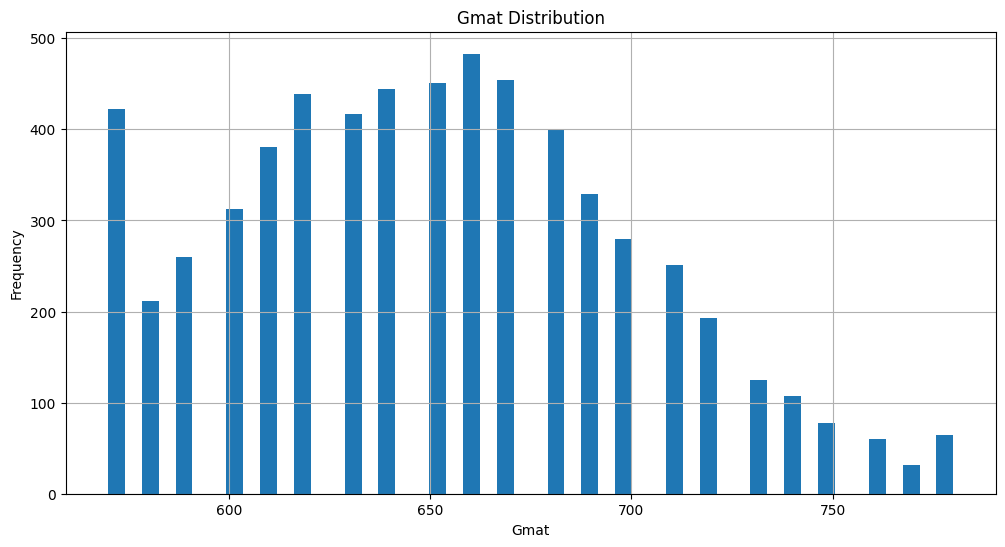

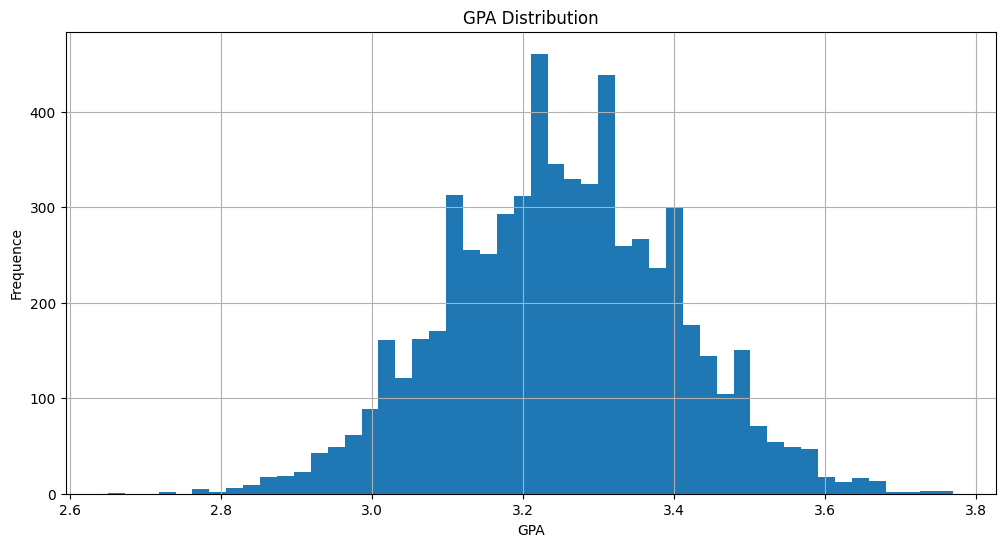

In [6]:
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = (12, 6)

# Plot histograms
df['gmat'].hist(bins=50)
plt.title('Gmat Distribution')
plt.xlabel('Gmat')
plt.ylabel('Frequency')
plt.show()

df['gpa'].hist(bins=50)
plt.title('GPA Distribution')
plt.xlabel('GPA')
plt.ylabel('Frequence')
plt.show()

#### GMAT

Data Distribution Analysis:

- Shape: The distribution is approximately unimodal, meaning there is one prominent peak around the 650-700 range.

- Skewness: The histogram appears to be slightly left-skewed (negatively skewed), meaning most values are concentrated towards the higher end of the GMAT scores, with a gradual tail on the left side.

- Symmetry: The distribution is not perfectly symmetrical, as there is more spread on the left side of the peak compared to the right.

- Peaks (Modes): There is one distinct peak around the 650-700 range, suggesting that most students' GMAT scores are within this range.

#### GPA

Data Distribution Analysis:

- Shape: The distribution appears to be approximately bell-shaped, indicating a somewhat normal distribution, though it has some irregularities and multiple small peaks.

- Symmetry: The distribution is fairly symmetric, with values spread somewhat evenly around the center.

- Skewness: The distribution shows a very slight positive skew (right skew), as the tail on the right side is a bit longer, but overall, it is close to being symmetric.

- Peaks (Modes): There are multiple peaks, with the most prominent peak around the 3.2 to 3.3 GPA range, indicating that the most common GPAs fall within this range.

## 4. Correlation Analysis with Scatter Plot Matrix

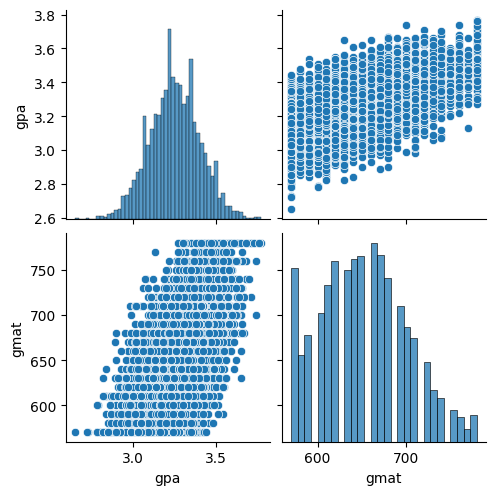

           gpa      gmat
gpa   1.000000  0.577539
gmat  0.577539  1.000000


In [8]:
import seaborn as sns
import matplotlib.pyplot as plt

# Select two features
features = ['gpa', 'gmat']

# Create scatter plot matrix
sns.pairplot(df[features])
plt.show()

# Calculate correlation between the selected features
correlation_matrix = df[features].corr()
print(correlation_matrix)

The scatter plot matrix shows a positive correlation between the features "gpa" and "gmat," as indicated by the upward trend of the points in the scatter plot between these two variables. Additionally, the correlation coefficient (0.577539) confirms a moderate positive correlation.

A positive correlation means that as one variable increases, the other tends to increase as well. In this context, students with higher GPAs also tend to have higher GMAT scores, and vice versa. This suggests that academic performance, as measured by GPA, could be a potential predictor of GMAT scores, implying that students who perform well in their undergraduate studies are more likely to achieve higher scores on the GMAT.

## 5. Heatmap of Correlation Values

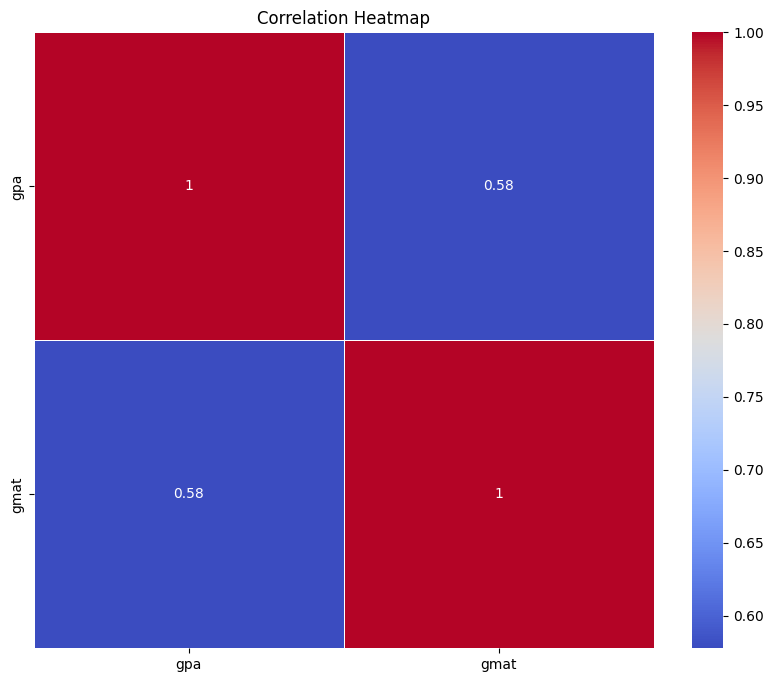

In [9]:
# Select only numeric columns
numeric_df = df[features]

# Compute the correlation matrix
correlation = numeric_df.corr()

# Create heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

The correlation coefficient between GPA and GMAT is shown as 0.58. This indicates a moderate positive correlation, meaning that as GPA increases, GMAT scores also tend to increase, but the relationship is not perfectly linear.

## 6. Standardization of Numeric Features

In [10]:
from sklearn.preprocessing import StandardScaler

# Initialize the scaler
scaler = StandardScaler()

# Apply the scaler to the numerical features
df[features] = scaler.fit_transform(df[features])

# Display the standardized data
print(df.head())

   application_id  gender  international       gpa       major      race  \
0               1  Female          False  0.325261    Business     Asian   
1               2    Male          False  0.193273  Humanities     Black   
2               3  Female           True  0.325261    Business       NaN   
3               4    Male          False  1.447159        STEM     Black   
4               5    Male          False  0.655231        STEM  Hispanic   

       gmat  work_exp          work_industry admission  
0 -0.630806       3.0     Financial Services     Admit  
1  0.586457       5.0  Investment Management       NaN  
2  1.195089       5.0             Technology     Admit  
3  0.789334       6.0             Technology       NaN  
4 -1.239437       5.0             Consulting       NaN  


For the analysis of the MBA dataset, standardization of GPA and GMAT scores was crucial for the following reasons:

Different Scales: The GPA and GMAT are originally measured on very different scales (GPA typically on a 4.0 scale, GMAT scores ranging from 200 to 800). Without standardization, the GMAT scores, being much larger, would dominate the analysis, while the GPA scores would have a much smaller impact. Standardizing them ensures that both features contribute equally to the analysis.

Fair Weighting in Analysis: If we plan to use these features in machine learning models (e.g., predicting MBA admission), algorithms like logistic regression, SVM, or neural networks would give more weight to the feature with a larger scale, which could lead to biased predictions. Standardizing them ensures that the models treat these features fairly.

Improved Model Performance: Standardization often leads to better convergence in gradient-based optimization algorithms, ensuring faster and more reliable training, especially when you have features with varying ranges like GPA and GMAT.